In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get the traffic stops map. Last 3 years from https://www.nashville.gov/departments/police/data-dashboard/vehicle-stops-map
df = pd.read_csv('../data/stops.csv', delimiter='\t', encoding='utf16', parse_dates=['stop_datetime'])
df['stop_datetime'] = pd.to_datetime(df['stop_datetime'])
df['month_year'] = df['stop_datetime'].dt.to_period('M')
df.head()

,addr,eth,race,Result Of Stop,sex,Stop Num,Stop Type,stop_datetime,latitude,longitude,month_year
0,Mm 213 8 I40 E,Not Hispanic,White,Driver Warned,Male,3724573,Vehicle Equipment Violation,2023-03-30 00:59:00,36.1410,-86.7178,2023-03
1,600 Block Korean Veterans Blvd,Not Hispanic,White,Driver Warned,Female,3724572,Moving Traffic Violation,2023-03-29 23:54:00,36.1555,-86.7775,2023-03
2,3400 Block West End Av,Not Hispanic,White,Driver Warned,Male,3724570,Moving Traffic Violation,2023-03-29 23:43:00,36.1378,-86.8206,2023-03
3,Old Hickory Blvd & Edmondson Pke,Not Hispanic,White,Driver Warned,Male,3724563,Regulatory,2023-03-29 22:01:00,36.0400,-86.7435,2023-03
4,00 Block White Bridge Pke,Not Hispanic,Black,Driver Warned,Female,3724560,Vehicle Equipment Violation,2023-03-29 20:14:00,36.1273,-86.8505,2023-03


In [3]:
grouped_data = df[['month_year', 'Stop Type']].groupby(['month_year', 'Stop Type']).size().unstack()
grouped_data.head(200)

Stop Type,Child Restraint,Investigative,Lpr (Verified Hit),Moving Traffic Violation,Other/Unk,Parking,Regulatory,Safety & Equip,Seatbelt,Vehicle Equipment Violation
month_year,,,,,,,,,,
2018-01,1.0,251.0,NaN,9459.0,126.0,31.0,2577.0,2369.0,502.0,6774.0
2018-02,3.0,228.0,NaN,8180.0,60.0,51.0,1856.0,1849.0,312.0,5373.0
2018-03,5.0,288.0,NaN,9061.0,69.0,26.0,2148.0,2003.0,421.0,5529.0
2018-04,NaN,233.0,NaN,8718.0,65.0,24.0,2067.0,1501.0,532.0,4794.0
2018-05,1.0,195.0,NaN,7621.0,84.0,31.0,1783.0,1207.0,375.0,3974.0
...,...,...,...,...,...,...,...,...,...,...
2022-11,NaN,13.0,NaN,1117.0,12.0,NaN,65.0,19.0,NaN,57.0
2022-12,NaN,9.0,NaN,866.0,8.0,1.0,72.0,15.0,8.0,61.0
2023-01,1.0,26.0,NaN,1511.0,20.0,NaN,141.0,23.0,8.0,124.0


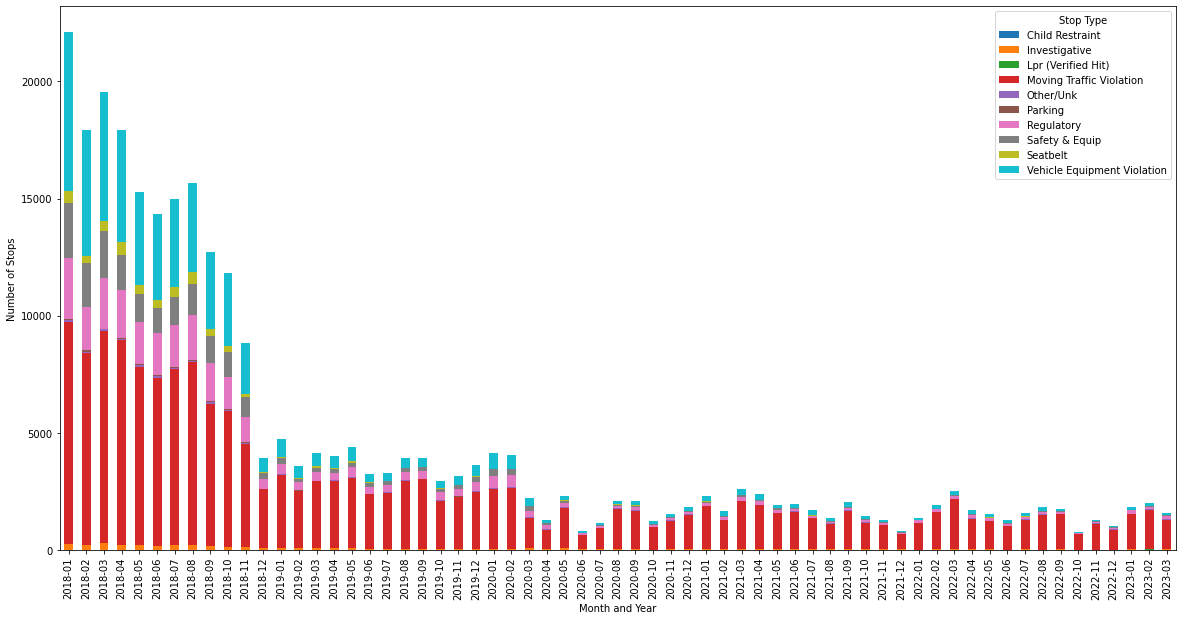

In [4]:
grouped_data.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.ylabel('Number of Stops')
plt.xlabel('Month and Year')
plt.show()

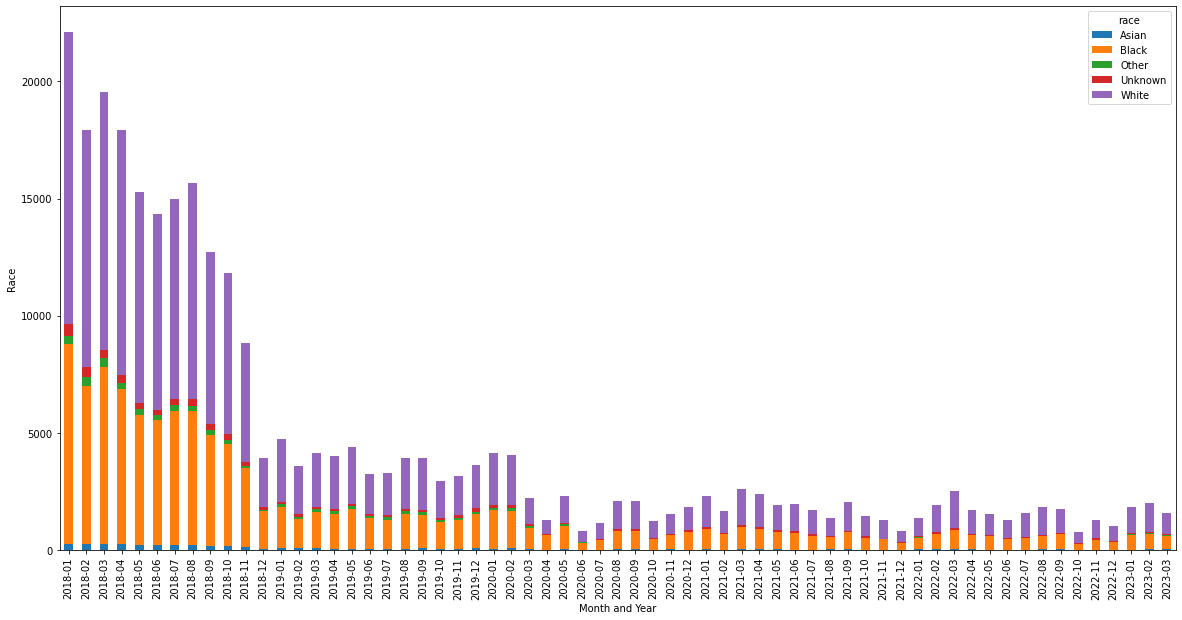

In [5]:
grouped_data = df[['month_year', 'race']].groupby(['month_year', 'race']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.ylabel('Race')
plt.xlabel('Month and Year')
plt.show()

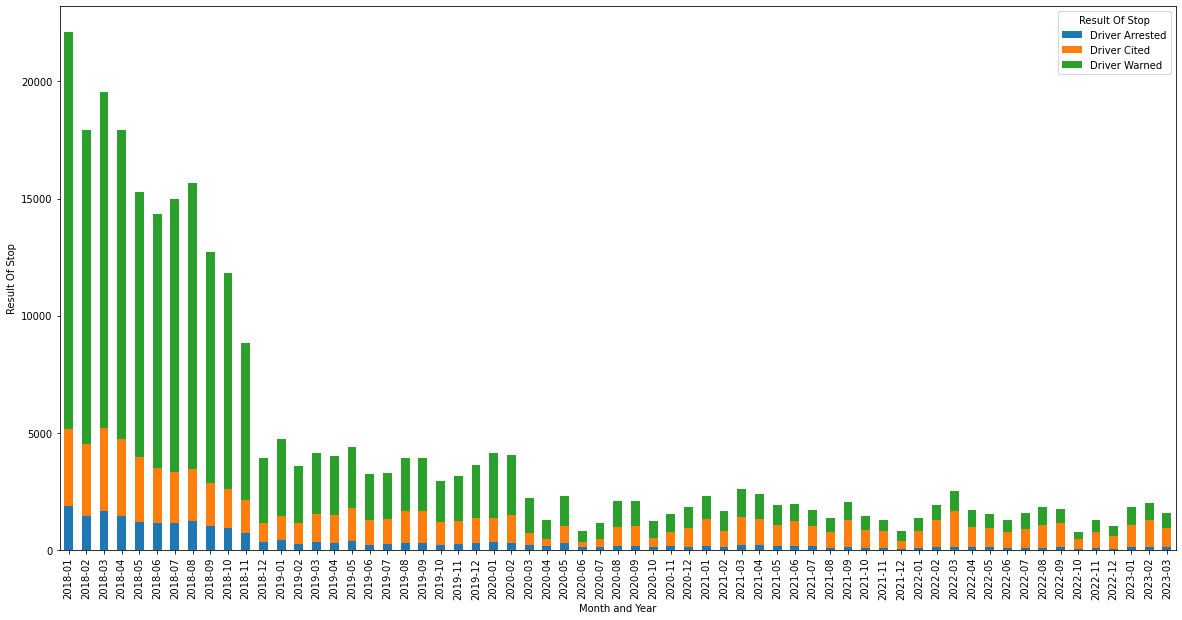

In [6]:
grouped_data = df[['month_year', 'Result Of Stop']].groupby(['month_year', 'Result Of Stop']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.ylabel('Result Of Stop')
plt.xlabel('Month and Year')
plt.show()